## To predict total sales by using features like money spent on marketing on indivdual items.

## Domain Analysis

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the data

data=pd.read_csv('Advertising.csv')

In [3]:
# see top five records

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# to see last five records

data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
# Get information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Statistical information about dataset

data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


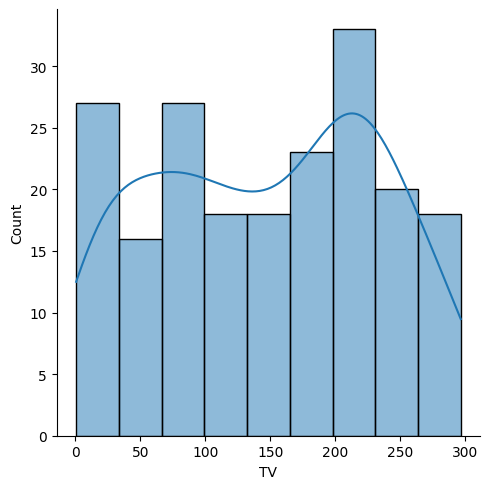

In [8]:
#Step 1 Univariate Analysis

#Analyzing TV
sns.displot(x=data.TV,kde=True)

<Axes: xlabel='Radio', ylabel='Count'>

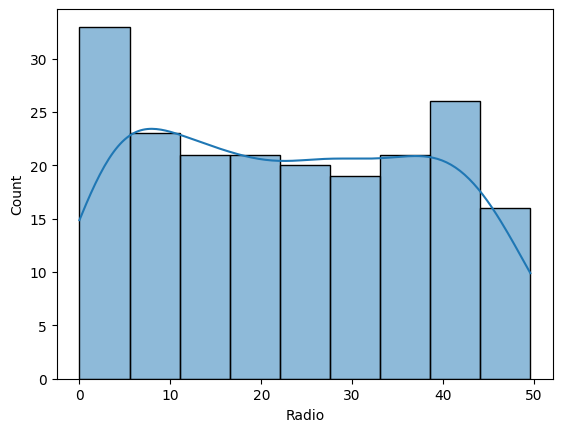

In [9]:
# Analyszing Radio

sns.histplot(x=data.Radio,kde=True)

<Axes: xlabel='Newspaper', ylabel='Count'>

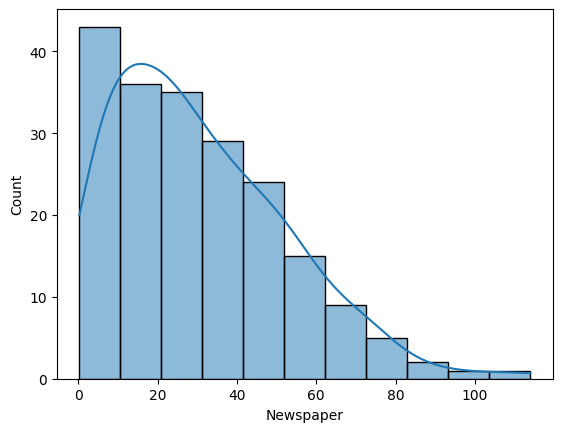

In [10]:
# Aanalyzing Newspaper

sns.histplot(x=data.Newspaper,kde=True)
# By looking at below plot we can say that there are less than 10 months when the marketing cost was high

In [ ]:
# Step 2 Bivariate Analysis
# This step is performed when inputs and output are known.
# 1st variable will be Inputs
# 2nd variable will be output/target variable.

In [11]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: xlabel='Radio', ylabel='Sales'>

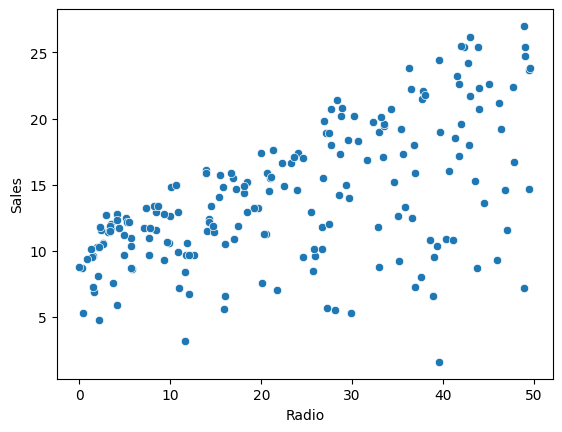

In [12]:
sns.scatterplot(x='Radio',y='Sales',data=data)

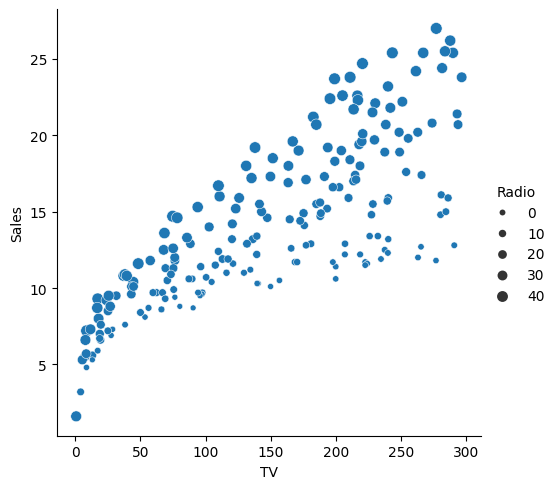

In [13]:
# Analyzing TV and Sales

sns.relplot(x='TV',y='Sales',data=data, size='Radio')
# The more marketing on TV is leading to more sales in the product.

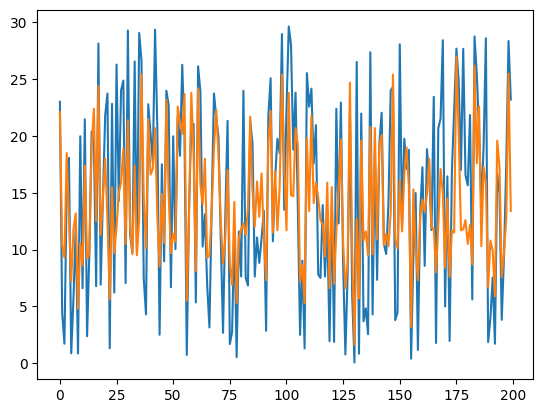

In [14]:
plt.plot(data.TV/10)
plt.plot(data.Sales)

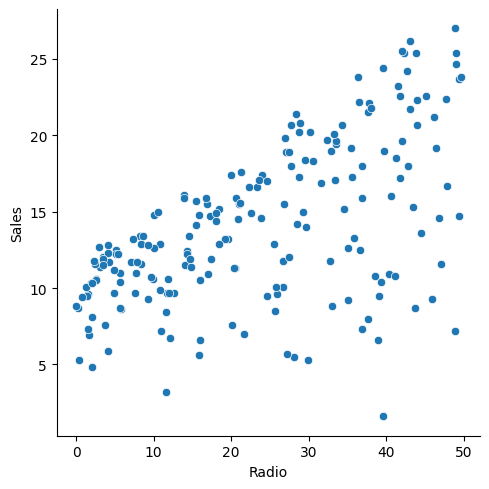

In [15]:
# Analyzing Radio and Sales

sns.relplot(x='Radio',y='Sales',data=data)
# Radio advertisments are not showing much trend for the sales of product.

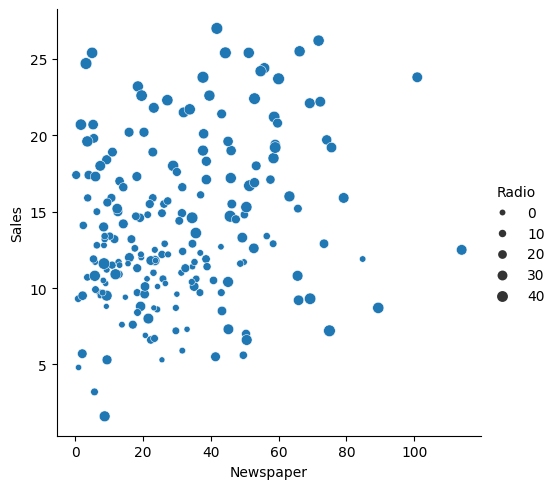

In [16]:
# Analyzing Newsapaper and Sales

sns.relplot(x='Newspaper',y='Sales',data=data, size='Radio')
# Newspaper advertisments are not showing much trend for the sales of product.

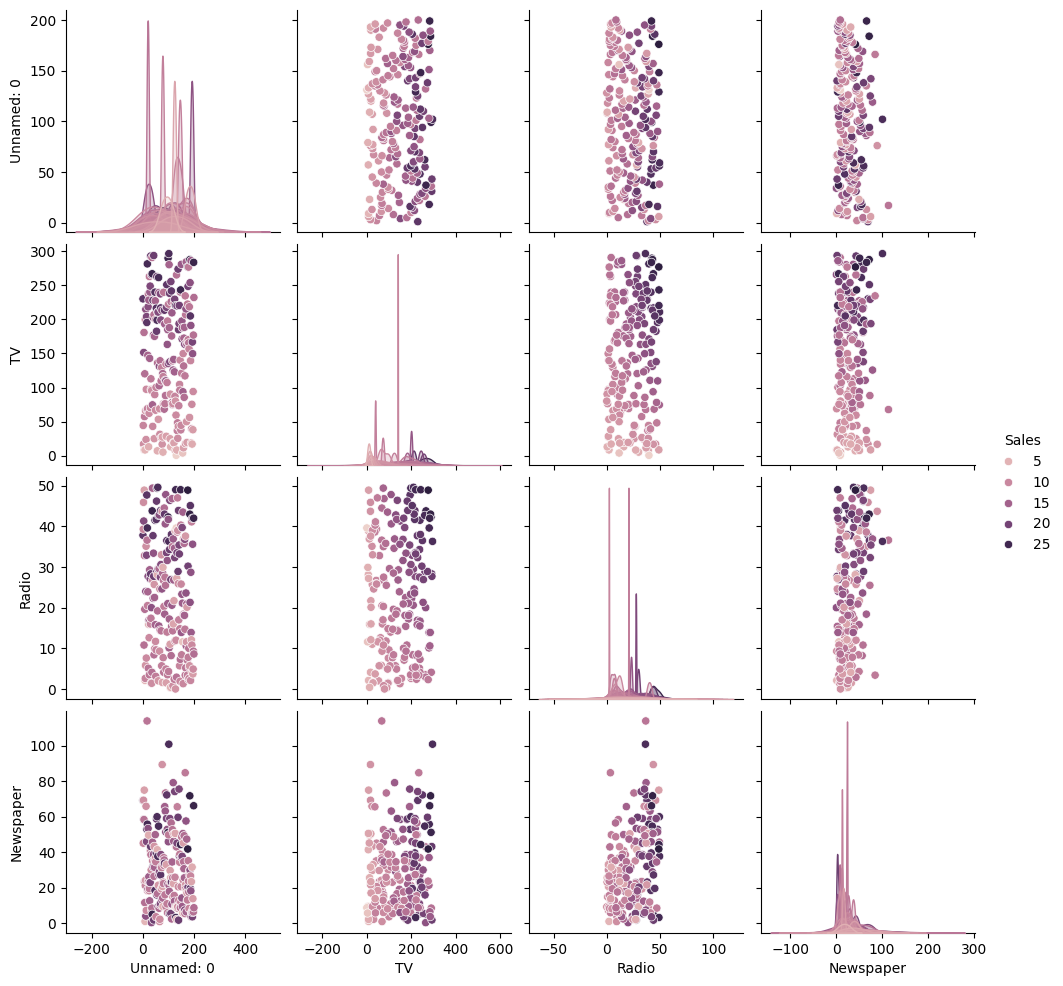

In [17]:
## Step 3 Multivariate Analysizing

sns.pairplot(data, hue='Sales')

## Data Preprocessing and Feature Engineering

In [18]:
# Finding missing values

data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: xlabel='TV'>

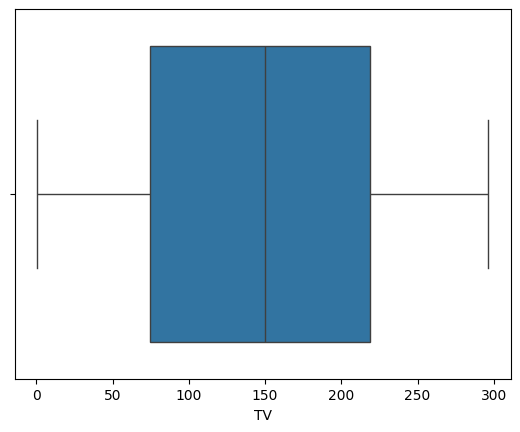

In [19]:
# Checking the outlier

sns.boxplot(x='TV',data=data)

<Axes: xlabel='Radio'>

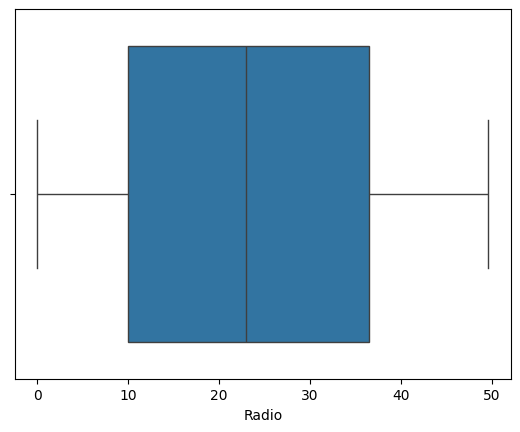

In [20]:
sns.boxplot(x='Radio',data=data)

<Axes: xlabel='Newspaper'>

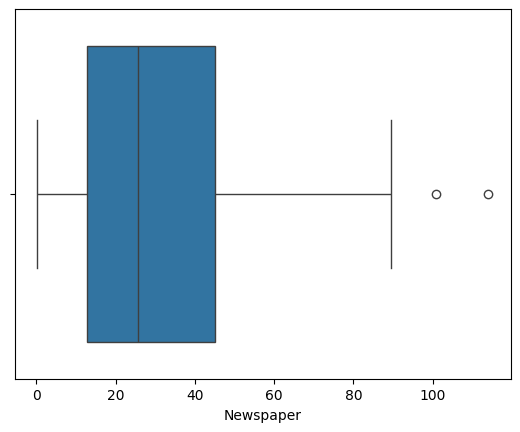

In [21]:
sns.boxplot(x='Newspaper',data=data)

### Feature Selection

In [22]:
# Dropping the unwanted variables

l1=['Unnamed: 0']
data.drop(l1,axis=1,inplace=True)

In [24]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: >

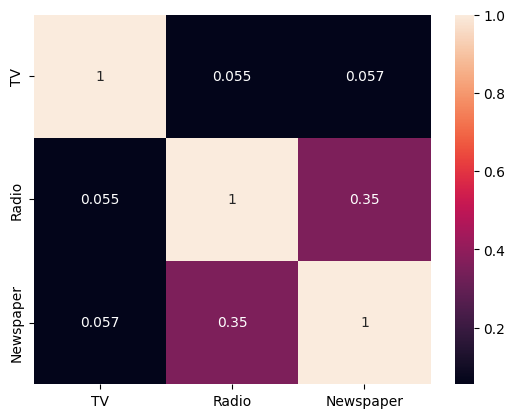

In [25]:
## Step 2 Checking the correlation

sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [26]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Model Creation

In [27]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [28]:
#Step 1 Independent and dependent variable creation

X=data[['TV','Radio','Newspaper']]  ## X variable contains all inputs
y=data.Sales                        ## y is output

In [29]:
print(y.shape)
print(X.shape)

(200,)
(200, 3)


In [30]:
# Step 2 Traning and testing data creation

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [31]:
y_train

26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
       ... 
104    20.7
129     9.7
183    26.2
174    11.5
122    11.6
Name: Sales, Length: 160, dtype: float64

In [32]:
# Step 3 Creating model

from sklearn.linear_model import LinearRegression
LR=LinearRegression()                                 # object creation
LR.fit(X_train,y_train)                               # training of linear regression
y_predict=LR.predict(X_test)

In [33]:
# Actual values

y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
Name: Sales, dtype: float64

In [34]:
# Values predicted by model

y_predict

array([17.2752476 , 16.74844593, 21.97674588, 24.59448907, 12.11768831,
       21.02033688, 10.15643252, 12.34380805, 11.70461016, 17.02091374,
       22.77376935, 15.3468411 ,  8.47830473, 14.9155752 , 18.61592987,
       18.78535771, 18.92262443, 14.411111  ,  9.65948532, 20.60497137,
       14.91294261, 17.84682569, 23.05099966,  7.74477655, 21.55734502,
       19.45793001, 13.93893979, 11.55855542, 18.37843109, 12.19352005,
       11.35032808,  9.91369153, 13.57335272, 15.18177818, 18.06379607,
        6.80705318, 14.14598886, 14.14649594, 14.1536933 , 10.69806825])

In [35]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [36]:
print(f"R2 Score of the model : {r2score}")

R2 Score of the model : 0.9085774752313167


In [37]:
X_test.shape

(40, 3)

In [38]:
## calculation of adjusted r2 score

adjusted_r2 = 1-(1-0.90)*(40-1)/(40-3-1)
print('Adjust R2 Score = ',adjusted_r2)

Adjust R2 Score =  0.8916666666666667


In [39]:
# root mean squared error

import math
print('MSE : ',(mean_squared_error(y_test,y_predict)))
print('RMSE : ',(math.sqrt(mean_squared_error(y_test,y_predict))))

MSE :  2.2171510725418964
RMSE :  1.4890100982001084


In [40]:
print('MAE =',(mean_absolute_error(y_test,y_predict)))

MAE = 1.2114892606469105


 ___________________________ END ___________________________